In [ ]:
pip install mnist

In [ ]:
import numpy as np
import mnist
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

type(train_images)

'''
# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Reshape the images.
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)
'''


'\n# Normalize the images.\ntrain_images = (train_images / 255) - 0.5\ntest_images = (test_images / 255) - 0.5\n\n# Reshape the images.\ntrain_images = np.expand_dims(train_images, axis=3)\ntest_images = np.expand_dims(test_images, axis=3)\n'

#Model Building

In [ ]:
num_filters = 8
filter_size = 3
pool_size = 2

# Build the model.
model = Sequential([
  Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(10, activation='softmax'),
])

# Compile the model.
model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# Train the model.
history = model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=3,
  validation_data=(test_images, to_categorical(test_labels)),
)

Epoch 1/3
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3668 - accuracy: 0.8962 - val_loss: 0.2002 - val_accuracy: 0.9412
Epoch 2/3
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1725 - accuracy: 0.9516 - val_loss: 0.1467 - val_accuracy: 0.9575
Epoch 3/3
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1273 - accuracy: 0.9631 - val_loss: 0.1165 - val_accuracy: 0.9649


In [ ]:
#@title Função para os plots (la_plots(history))
def la_plots(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    #Epochs
    epochs = range(len(val_loss))

    # Plotting loss
    
    COLOR = 'white'
    plt.rcParams['axes.labelcolor'] = COLOR
    plt.rcParams['xtick.color'] = COLOR
    plt.rcParams['ytick.color'] = COLOR
    

    fig1 = plt.figure(figsize=(8,5))
    gs1 = fig1.add_gridspec(1, 1)
    ax1 = fig1.add_subplot(gs1[0, 0])

    ax1.plot(epochs, loss, 'r-o', label='Training')
    ax1.plot(epochs, val_loss, 'b-o', label='Validation')
    ax1.set_xlabel('Epochs', size=16)
    ax1.set_ylabel('Loss', size=16)
    #ax1.set_yscale('log')
    ax1.legend()
    plt.show()

    # Plotting accuracy metric

    fig2 = plt.figure(figsize=(8,5))
    gs2 = fig2.add_gridspec(1, 1)
    ax2 = fig2.add_subplot(gs2[0, 0])

    ax2.plot(epochs, accuracy, 'r-o', label='Training')
    ax2.plot(epochs, val_accuracy, 'b-o', label='Validation')
    ax2.set_xlabel('Epochs', size=16)
    ax2.set_ylabel('Accuracy', size=16)
    #ax2.set_yscale('log')
    ax2.legend()
    plt.show()

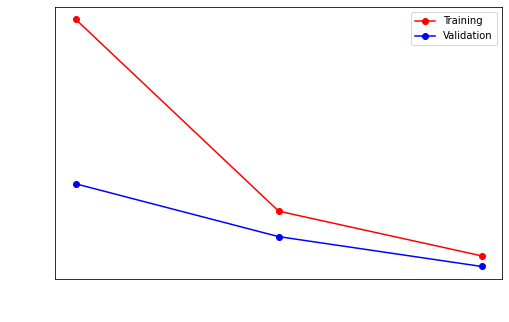

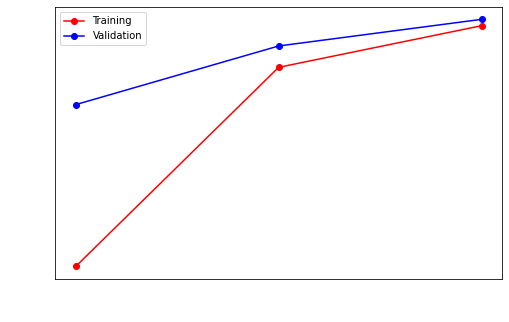

In [ ]:
la_plots(history)

#Using the model
Let's try to make some predicitions with the model.

In [ ]:
predictions = model.predict(test_images[:5])

print(np.argmax(predictions, axis=1))

print(test_labels[:5]) 

[7 2 1 0 4]
[7 2 1 0 4]


Now we are going to make some changes in the model to see what happens. We begin by adding an extra convolutional layers. 

In [ ]:
model_layers = Sequential([
  Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
  Conv2D(num_filters, filter_size),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(10, activation='softmax'),
])

model_layers.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

history_layers = model_layers.fit(
  train_images,
  to_categorical(train_labels),
  epochs=3,
  validation_data=(test_images, to_categorical(test_labels)),
)

Epoch 1/3
1875/1875 [==============================] - 35s 19ms/step - loss: 0.3182 - accuracy: 0.9053 - val_loss: 0.1464 - val_accuracy: 0.9567
Epoch 2/3
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1208 - accuracy: 0.9645 - val_loss: 0.1046 - val_accuracy: 0.9652
Epoch 3/3
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0848 - accuracy: 0.9741 - val_loss: 0.0856 - val_accuracy: 0.9725


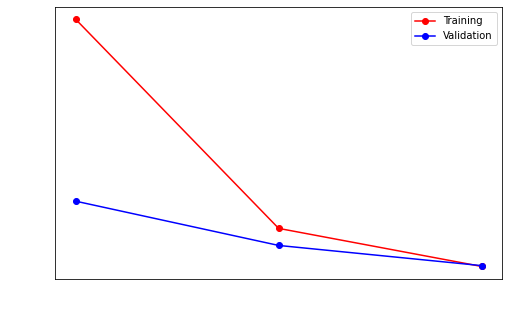

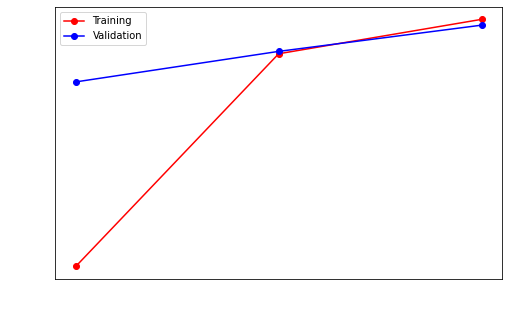

In [ ]:
la_plots(history_layers)

The system still mantains good accuracy. What about adding 50% dropout?

In [ ]:
from tensorflow.keras.layers import Dropout

model_dropout = Sequential([
  Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
  MaxPooling2D(pool_size=pool_size),
  Dropout(0.5),
  Flatten(),
  Dense(10, activation='softmax'),
])

model_dropout.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

history_dropout = model_dropout.fit(
  train_images,
  to_categorical(train_labels),
  epochs=3,
  validation_data=(test_images, to_categorical(test_labels)),
)

Epoch 1/3
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4311 - accuracy: 0.8688 - val_loss: 0.2006 - val_accuracy: 0.9422
Epoch 2/3
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2525 - accuracy: 0.9238 - val_loss: 0.1566 - val_accuracy: 0.9540
Epoch 3/3
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2201 - accuracy: 0.9330 - val_loss: 0.1305 - val_accuracy: 0.9606


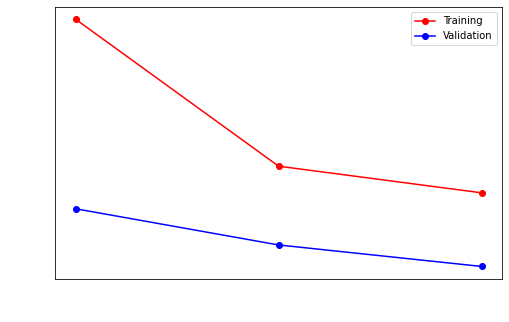

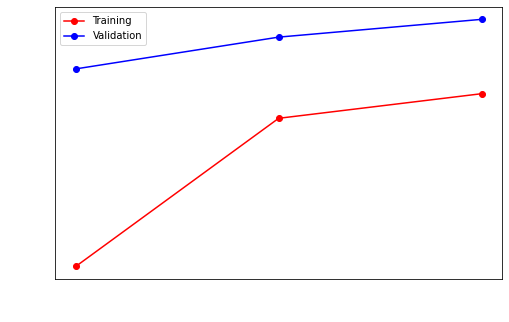

In [ ]:
la_plots(history_dropout)

Now let's try to change some of the network parameters, like strides, padding  and number of filters.

In [ ]:
num_filters = 5
filter_size = 5

model_new = Sequential([
    Conv2D(num_filters, filter_size, input_shape=(28, 28, 1),
    strides=2,
    padding='same',
    activation='relu',
    ),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(10, activation='softmax'),
])

model_new.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

history_new = model_new.fit(
  train_images,
  to_categorical(train_labels),
  epochs=3,
  validation_data=(test_images, to_categorical(test_labels)),
)

Epoch 1/3
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3854 - accuracy: 0.8933 - val_loss: 0.1582 - val_accuracy: 0.9525
Epoch 2/3
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1498 - accuracy: 0.9554 - val_loss: 0.1269 - val_accuracy: 0.9616
Epoch 3/3
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1250 - accuracy: 0.9615 - val_loss: 0.1051 - val_accuracy: 0.9676


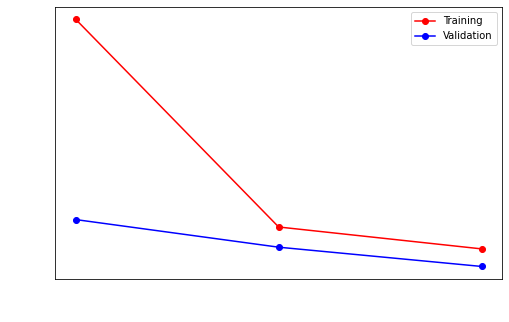

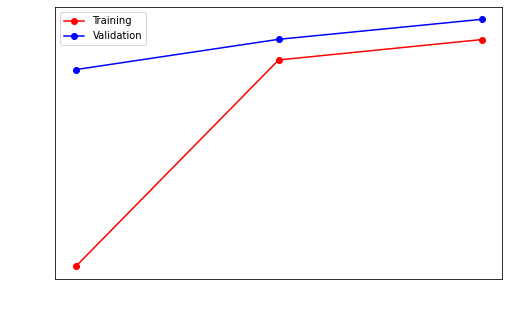

In [ ]:
la_plots(history_new)

Not much change, let's try to change the filter size.

In [ ]:
num_filters = 5
filter_size = 5

model_new2 = Sequential([
    Conv2D(num_filters, filter_size, input_shape=(28, 28, 1),
    strides=2,
    padding='same',
    activation='relu',
    ),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(10, activation='softmax'),
])

model_new2.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

history_new2 = model_new2.fit(
  train_images,
  to_categorical(train_labels),
  epochs=3,
  validation_data=(test_images, to_categorical(test_labels)),
)

Epoch 1/3
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4406 - accuracy: 0.8812 - val_loss: 0.1718 - val_accuracy: 0.9496
Epoch 2/3
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1560 - accuracy: 0.9537 - val_loss: 0.1279 - val_accuracy: 0.9608
Epoch 3/3
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1203 - accuracy: 0.9633 - val_loss: 0.1046 - val_accuracy: 0.9677


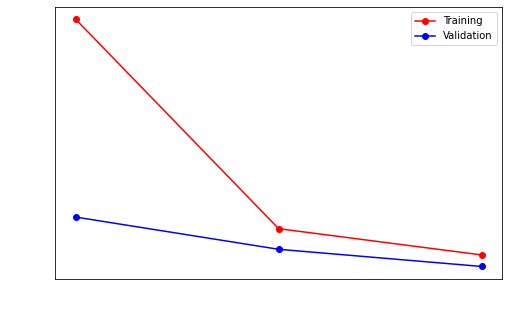

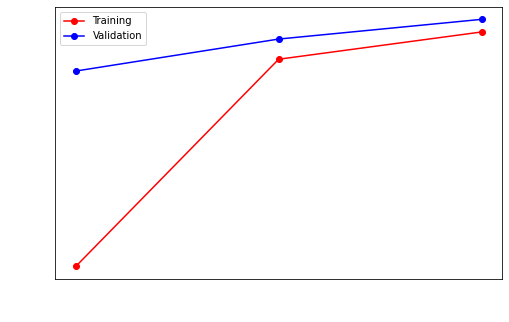

In [ ]:
la_plots(history_new2)

Finally, we will try all the changes together.

In [ ]:
num_filters = 5
filter_size = 5

num_filters2 = 10
filter_size2 = 10

model_total = Sequential([
    Conv2D(num_filters, filter_size, input_shape=(28, 28, 1),           
    strides=2,
    padding='same',
    activation='relu',
    ),
    Conv2D(num_filters2, filter_size2),
  MaxPooling2D(pool_size=pool_size),
  Dropout(0.5),
  Flatten(),
  Dense(10, activation='softmax'),
])

model_total.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

history_total = model_total.fit(
  train_images,
  to_categorical(train_labels),
  epochs=3,
  validation_data=(test_images, to_categorical(test_labels)),
)

Epoch 1/3
1875/1875 [==============================] - 18s 10ms/step - loss: 0.5208 - accuracy: 0.8346 - val_loss: 0.1410 - val_accuracy: 0.9602
Epoch 2/3
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2423 - accuracy: 0.9280 - val_loss: 0.1016 - val_accuracy: 0.9702
Epoch 3/3
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2052 - accuracy: 0.9389 - val_loss: 0.0899 - val_accuracy: 0.9736


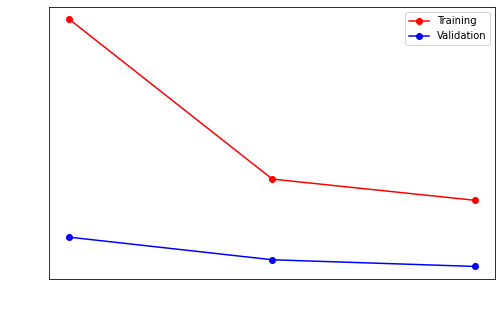

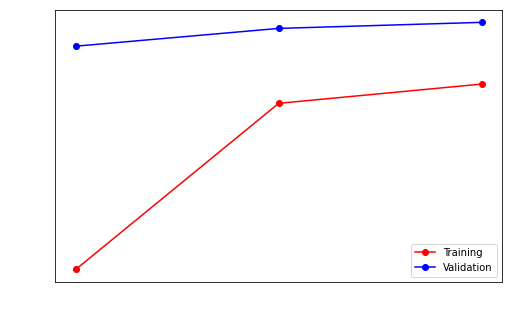

In [ ]:
la_plots(history_total)

Here the model shows some signs of overfitting.

Modelo da Tarefa 4

In [ ]:
model4 = Sequential()
model4.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(28, 28, 1)))
model4.add(Activation('relu'))
model4.add(Conv2D(32, (3, 3)))
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Conv2D(64, (3, 3), padding='same'))
model4.add(Activation('relu'))
model4.add(Conv2D(64, (3, 3)))
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Flatten())
model4.add(Dense(512))
model4.add(Activation('relu'))
model4.add(Dense(10, activation='softmax'))

# Compile the model.
model4.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# Train the model.
history4 = model4.fit(
  train_images,
  to_categorical(train_labels),
  epochs=3,
  validation_data=(test_images, to_categorical(test_labels)),
)


Epoch 1/3
1875/1875 [==============================] - 209s 111ms/step - loss: 0.1073 - accuracy: 0.9664 - val_loss: 0.0272 - val_accuracy: 0.9909
Epoch 2/3
1875/1875 [==============================] - 203s 108ms/step - loss: 0.0359 - accuracy: 0.9890 - val_loss: 0.0228 - val_accuracy: 0.9926
Epoch 3/3
1875/1875 [==============================] - 204s 109ms/step - loss: 0.0257 - accuracy: 0.9920 - val_loss: 0.0221 - val_accuracy: 0.9932


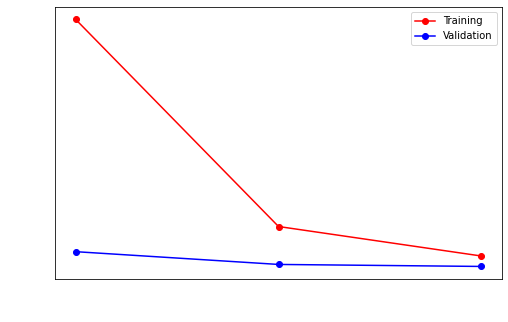

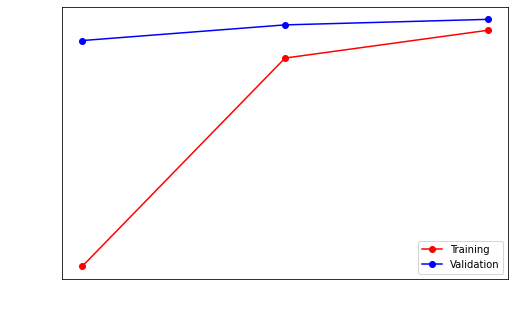

In [ ]:
la_plots(history4)